<a href="https://colab.research.google.com/github/dianrdn/rc-dataanalytic/blob/master/Machine_Learning_(Supervised_%26_Unsupervised_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Hands-on of Data Driven Decision Making Training - 23 September 2019 - PUSDIKLAT Keuangan Umum, Pancoran*


---



# 1. Supervised Learning

Sub topics covered in this practice:
* Regression
* Classification
* Association Rule

## a. Regression
Regression analysis is a basic method used in statistical analysis of data. It’s a statistical method which allows estimating the relationships among variables. One needs to identify dependent variable which will vary based on the value of the independent variable.

### Linear Regression
linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). [Wikipedia](https://en.wikipedia.org/wiki/Linear_regression)

In [0]:
# Import library
import pandas as pd

In [0]:
# Import Dataset
salary_df = pd.read_csv('https://raw.githubusercontent.com/dianrdn/rc-dataanalytic/master/dataset/Salary_Data.csv')

In [4]:
# Prints the Dataset Information
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


In [0]:
# Prints 10 first Row
salary_df.head(30)

In [0]:
# Prints descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution
salary_df.describe().transpose()

In [0]:
# Import Library to Visualize the Data
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

# Show the Distribuion
sns.scatterplot(x="YearsExperience", y="Salary", data= salary_df)


In [0]:
# Select X and Y Variable
X = salary_df.iloc[:, :-1].values
Y = salary_df.iloc[:, 1].values

In [0]:
# Modelling
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, Y)

In [0]:
# Show Coefficent and Intercept
print('Coefficient = ', lr.coef_)
print('Intercept =', lr.intercept_)

In [0]:
plt.scatter(X, Y)
plt.plot(X, lr.predict(X), color = "green")
plt.title("Salary vs Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

## b. Classification

In [8]:
# Import Library
import pandas as pd

#Import the files to Google Colab
url = 'https://raw.githubusercontent.com/dianrdn/rc-dataanalytic/master/dataset/churn_trasnsformed_new.csv'
df_csv = pd.read_csv(url, sep=',')

# Show 10 first Row
df_csv.head()

,Unnamed: 0,gender_0,gender_1,SeniorCitizen_0,SeniorCitizen_1,Partner_0,Partner_1,Dependents_0,Dependents_1,tenure,PhoneService_0,PhoneService_1,MultipleLines_0,MultipleLines_1,MultipleLines_2,InternetService_0,InternetService_1,InternetService_2,OnlineSecurity_0,OnlineSecurity_1,OnlineSecurity_2,OnlineBackup_0,OnlineBackup_1,OnlineBackup_2,DeviceProtection_0,DeviceProtection_1,DeviceProtection_2,TechSupport_0,TechSupport_1,TechSupport_2,StreamingTV_0,StreamingTV_1,StreamingTV_2,StreamingMovies_0,StreamingMovies_1,StreamingMovies_2,Contract_0,Contract_1,Contract_2,PaperlessBilling_0,PaperlessBilling_1,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,2985,2985.0,0
1,1,1,0,0,1,1,0,0,1,34,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,5695,18895.0,0
2,2,1,0,0,1,1,0,0,1,2,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,5385,10815.0,1
3,3,1,0,0,1,1,0,0,1,45,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1,1,423,184075.0,0
4,4,0,1,0,1,1,0,0,1,2,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,707,15165.0,1


In [0]:
# Remove "Unnamed:O" Coloumn
df = df_csv.drop("Unnamed: 0", axis=1)
df.head()

In [0]:
# Check the Data Infomation
df.info()

In [0]:
#Import MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

# initialize min-max scaler
mm_scaler = MinMaxScaler()
column_names = df.columns.tolist()
column_names.remove('Churn')

# Transform all attributes
df[column_names] = mm_scaler.fit_transform(df[column_names])
df.sort_index(inplace=True)
df.head()

In [0]:
# Selecting the Feature, by remove the unused feature 
feature = ['Churn', 'TotalCharges']
train_feature = df.drop(feature, axis=1)

# Set The Target
train_target = df["Churn"]

In [0]:
# Show the Feature
train_feature.head(5)

In [0]:
# Split Data
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(train_feature ,train_target, shuffle = True, test_size=0.3, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [0]:
# Show the training data
X_train.head()

#### Decision Tree

We use [Scikit Learn DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) function. Below is the default parameter:


`DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)`,

An explanation of the decision tree can be seen here.[Medium: Decision Tree](https://medium.com/deep-math-machine-learning-ai/chapter-4-decision-trees-algorithms-b93975f7a1f1)

In [0]:
# Import library
from sklearn import tree

# Train Decision Tree
dtc = tree.DecisionTreeClassifier(min_impurity_decrease=0.01)
dtc.fit(X_train, y_train)

# Predict to Test Data 
y_preddtc = dtc.predict(X_test)

In [0]:
# Plot the tree
tree.plot_tree(dtc.fit(X_train, y_train), class_names=['0','1']) 

In [0]:
# Visualize with graphviz

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [0]:
# Import the metrics class
from sklearn import metrics

# Show the Confussion Matrix
cnf_matrixdtc = metrics.confusion_matrix(y_test, y_preddtc)
cnf_matrixdtc

In [0]:
# Show the Accuracy, Precision, Recall
acc_dtc = metrics.accuracy_score(y_test, y_preddtc)
prec_dtc = metrics.precision_score(y_test, y_preddtc)
rec_dtc = metrics.recall_score(y_test, y_preddtc)
f1_dtc = metrics.f1_score(y_test, y_preddtc)
kappa_dtc = metrics.cohen_kappa_score(y_test, y_preddtc)

print("Accuracy:", acc_dtc )
print("Precision:", prec_dtc)
print("Recall:", rec_dtc)
print("F1 Score:", f1_dtc)
print("Cohens Kappa Score:", kappa_dtc)

In [0]:
# Cross-validation score
cv_iterations = 5
cv_score = cross_val_score(dtc, train_feature, train_target, cv=cv_iterations)
print('Accuracy with cross-validation (split size = {}): {} (+/- {})'
      .format(cv_iterations, round(cv_score.mean(),2), round(cv_score.std() * 2,2)))

In [0]:
# Import Visualization Package
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

# Visualize ROC Curve
y_pred_probadtc = dtc.predict_proba(X_test)[::,1]
fprdtc, tprdtc, _ = metrics.roc_curve(y_test,  y_pred_probadtc)
aucdtc = metrics.roc_auc_score(y_test, y_pred_probadtc)
plt.plot(fprdtc,tprdtc,label="Decision Tree, auc="+str(aucdtc))
plt.legend(loc=4)
plt.show()

#### K-Nearest Neighbor

We use Scikit Learn KNeighborsClassifier function. Here is the default parameter:

`KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, metric=’minkowski’, metric_params=None, n_jobs=None, **kwargs)`

A small value of k means that noise will have a higher influence on the result and a large value make it computationally expensive. Data scientists usually choose as an odd number if the number of classes is 2 and another simple approach to select k is set k=sqrt(n).

In [0]:
# Import library
from sklearn.neighbors import KNeighborsClassifier

# Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors= 75)
knn.fit(X_train, y_train)

# Predict to test data
y_predknn = knn.predict(X_test)

In [0]:
# Show the Confussion Matrix
cnf_matrixknn = metrics.confusion_matrix(y_test, y_predknn)
cnf_matrixknn

In [0]:
# Show the Accuracy, Precision, Recall
acc_knn = metrics.accuracy_score(y_test, y_predknn)
prec_knn = metrics.precision_score(y_test, y_predknn)
rec_knn = metrics.recall_score(y_test, y_predknn)
f1_knn = metrics.f1_score(y_test, y_predknn)
kappa_knn = metrics.cohen_kappa_score(y_test, y_predknn)

print("Accuracy:", acc_knn)
print("Precision:", prec_knn)
print("Recall:", rec_knn)
print("F1 Score:", f1_knn)
print("Cohens Kappa Score:", kappa_knn)

In [0]:
# Cross-validation score
cv_iterations = 10
cv_score = cross_val_score(knn, train_feature, train_target, cv=cv_iterations)
print('Accuracy with cross-validation (split size = {}): {} (+/- {})'
      .format(cv_iterations, round(cv_score.mean(),2), round(cv_score.std() * 2,2)))

In [0]:
# ROC Curve
y_pred_probaknn = knn.predict_proba(X_test)[::,1]
fprknn, tprknn, _ = metrics.roc_curve(y_test,  y_pred_probaknn)
aucknn = metrics.roc_auc_score(y_test, y_pred_probaknn)
plt.plot(fprknn,tprknn,label="K-NN, auc="+str(aucknn))
plt.legend(loc=4)
plt.show()

#### Naive Bayes

We use Scikit Learn [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) function. Here is the default parameter:

`class sklearn.naive_bayes.GaussianNB(priors=None, var_smoothing=1e-09`


In [0]:
from sklearn.naive_bayes import GaussianNB 

# Train Naive Bayes Model
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_predgnb= gnb.predict(X_test)

In [0]:
# Show the Confussion Matrix
cnf_matrixgnb = metrics.confusion_matrix(y_test, y_predgnb)
cnf_matrixgnb

In [0]:
# Show the Accuracy, Precision, Recall
acc_gnb = metrics.accuracy_score(y_test, y_predgnb)
prec_gnb = metrics.precision_score(y_test, y_predgnb)
rec_gnb = metrics.recall_score(y_test, y_predgnb)
f1_gnb = metrics.f1_score(y_test, y_predgnb)
kappa_gnb = metrics.cohen_kappa_score(y_test, y_predgnb)

print("Accuracy:", acc_gnb)
print("Precision:", prec_gnb)
print("Recall:", rec_gnb)
print("F1 Score:", f1_gnb)
print("Cohens Kappa Score:", kappa_gnb)

In [0]:
# Cross-validation score
cv_iterations = 10
cv_score = cross_val_score(gnb, train_feature, train_target, cv=cv_iterations)
print('Accuracy with cross-validation (split size = {}): {} (+/- {})'
      .format(cv_iterations, round(cv_score.mean(),2), round(cv_score.std() * 2,2)))

In [0]:
# ROC Curve
y_pred_probagnb = gnb.predict_proba(X_test)[::,1]
fprgnb, tprgnb, _ = metrics.roc_curve(y_test,  y_pred_probagnb)
aucgnb = metrics.roc_auc_score(y_test, y_pred_probagnb)
plt.plot(fprgnb,tprgnb,label="Naive Bayes, auc="+str(aucgnb))
plt.legend(loc=4)
plt.show()

In [0]:
# Comparing Model Performance
print("Decision Tree Accuracy =",acc_dtc)
print("Decision Tree Precision =",prec_dtc)
print("Decision Tree Recall =",rec_dtc)
print("Decision Tree F1-Score =", f1_dtc)
print("_______________________")
print("k-NN Accuracy =", acc_knn)
print("k-NN Precision =", prec_knn)
print("k-NN Recall =", rec_knn)
print("k-NN F1-Score =", f1_knn)
print("_______________________")
print("Naive Bayes Accuracy =", acc_gnb)
print("Naive Bayes Precision =", prec_gnb)
print("Naive Bayes Recall =", rec_gnb)
print("Naive Bayes F1-Score =", f1_gnb)

In [0]:
# Comparing ROC Curve
plt.plot(fprdtc,tprdtc,label="Decision Tree, auc="+str(aucdtc))
plt.plot(fprknn,tprknn,label="K-NN, auc="+str(aucknn))
plt.plot(fprgnb,tprgnb,label="Naive Bayes, auc="+str(aucgnb))
plt.legend(loc=4)
plt.show()

## c. Association Rule

In [0]:
# Import Library
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [0]:
# Import dataset
retail_df = pd.read_excel("https://raw.githubusercontent.com/apriandito/bigdatacert/master/dataset/Online%20Retail.xlsx")
retail_df.head()

In [0]:
# Remove additional spaces
retail_df['Description'] = retail_df['Description'].str.strip()

# Remove NA values
retail_df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)

# Remove cancelled orders
retail_df['InvoiceNo'] = retail_df['InvoiceNo'].astype('str')
retail_df = retail_df[~retail_df['InvoiceNo'].str.contains('C')]

In [0]:
# Create Encode Function
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

def create_basket(country_filter):
    basket = (retail_df[retail_df['Country'] == country_filter]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
    return basket

In [0]:
country_filter = "France"
basket_french = create_basket("France")
basket_sets = basket_french.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)

In [0]:
frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)

In [0]:
# Generate Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
rules.head()

# 2. Unsupervised Learning

Sub topics covered in this practice:
* Clustering

### a. Clustering

#### K-Means Clustering

In [0]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Plot styling
import seaborn as sns; sns.set()  # for plot styling

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [0]:
# Import Dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/dianrdn/rc-dataanalytic/master/dataset/human_development_index.csv')

In [10]:
# Show 10 Rows of Dataset
dataset.head(10)

,KOTA,ID,HDI,REVENUE
0,"Ambon, Kota",IDN_Ambon_Kota_18139,79.58,8.486130e+11
1,"Balikpapan, Kota",IDN_Balikpapan_Kota_18130,79.87,2.422210e+12
2,"Banda Aceh, Kota",IDN_Banda_Aceh_Kota_73705,79.00,9.282410e+11
3,"Bandar Lampung, Kota",IDN_Bandar_Lampung_Kota_18134,77.17,1.688410e+12
4,"Bandung, Kota",IDN_Bandung_Kota_18015,77.32,4.332090e+12
5,"Banjar, Kota",IDN_Banjar_Kota_73707,72.84,6.209170e+11
6,"Banjarbaru, Kota",IDN_Banjarbaru_Kota_73706,76.86,7.475670e+11
7,"Banjarmasin, Kota",IDN_Banjarmasin_Kota_18113,75.28,1.285110e+12
8,"Batam, Kota",IDN_Batam_Kota_73708,78.73,1.749110e+12
9,"Batu, Kota",IDN_Batu_Kota_73709,76.09,5.536180e+11


In [11]:
# Show lenght of Dataset
len(dataset) 

468

In [12]:
# Statistics Descriptive
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
HDI,468.0,7.223030e+01,4.916730e+00,4.929000e+01,7.028750e+01,7.267500e+01,7.505500e+01,8.051000e+01
REVENUE,468.0,1.061428e+12,6.911188e+11,5.011239e+09,6.228678e+11,8.535830e+11,1.330855e+12,5.950670e+12


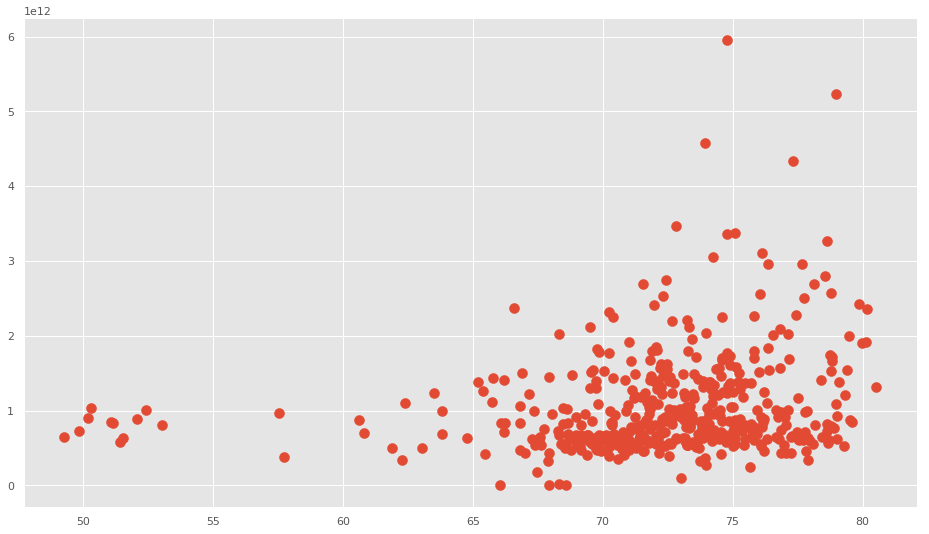

In [19]:
# Plotting the values to understand the spread
hdi = dataset['HDI'].values
revenue = dataset['REVENUE'].values
X = np.array(list(zip(hdi, revenue)))
plt.scatter(hdi, revenue, s=100)

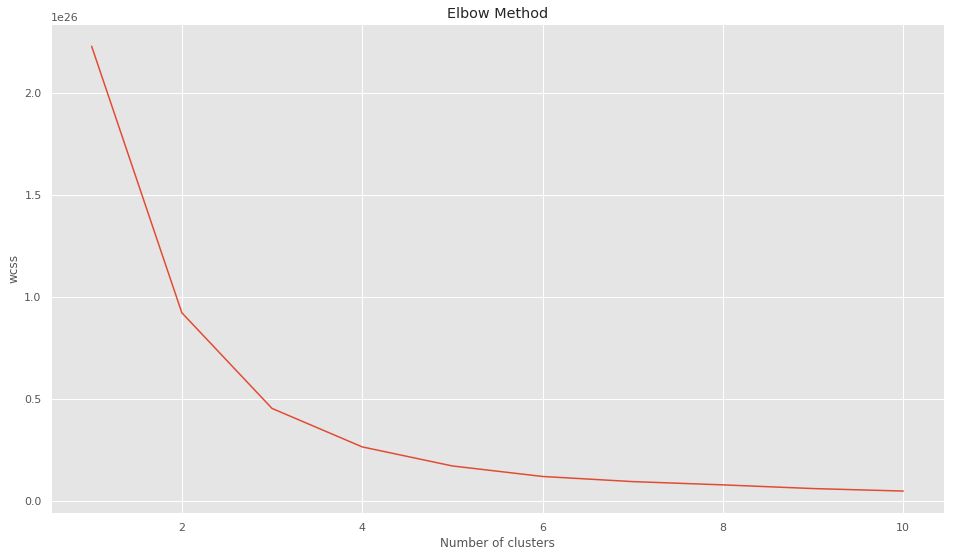

In [20]:
#Elbow
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [21]:
#Silhoutte
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.6780706730873529
For n_clusters=3, The Silhouette Coefficient is 0.6424467996374692
For n_clusters=4, The Silhouette Coefficient is 0.6317826055899812
For n_clusters=5, The Silhouette Coefficient is 0.5611699554209549
For n_clusters=6, The Silhouette Coefficient is 0.5632720418609627
For n_clusters=7, The Silhouette Coefficient is 0.5405832059896862
For n_clusters=8, The Silhouette Coefficient is 0.5382775129448911
For n_clusters=9, The Silhouette Coefficient is 0.5392325062603397
For n_clusters=10, The Silhouette Coefficient is 0.5411007508596537


In [0]:
# Fitting Model with K-Means
km2=KMeans(n_clusters=2,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km2.fit_predict(X)

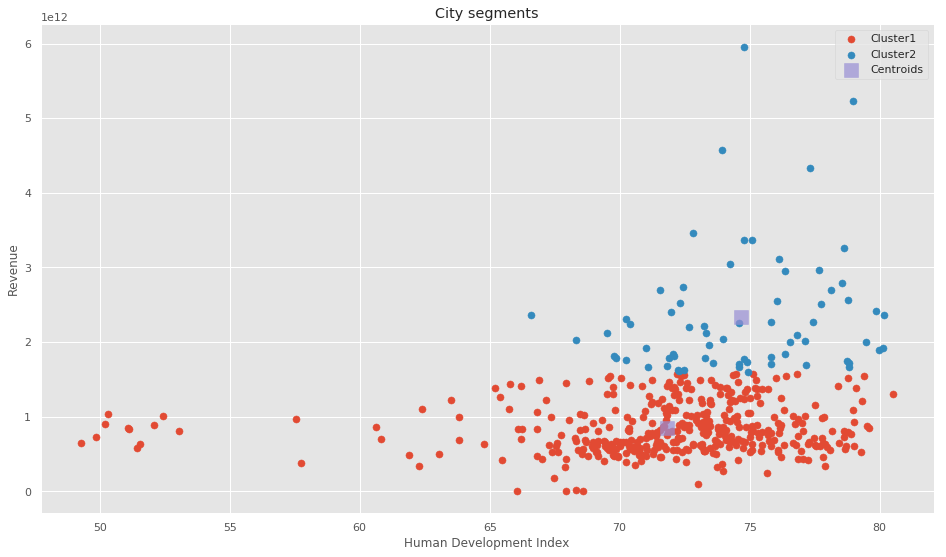

In [24]:
# Visualising the clusters for k=2
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, label='Cluster2')


plt.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1],s=200,marker='s', alpha=0.7, label='Centroids')
plt.title('City segments')
plt.xlabel('Human Development Index')
plt.ylabel('Revenue')
plt.legend()
plt.show()